In [1]:
using Gadfly
using Interact

In this notebook, we compare the singular values from a matrix of real data from a genomics data set against a random model. The hypothesis we have is that the matrix of real data has a low rank deterministic component and a random component. How well is the random component described by the Marchenko-Pastur law?

# Reviewing the Marchenko-Pastur law

First, let's remind ourselves of how the Marchenko-Pastur law looks like.

It's conventionally presented as the distribution associated with eigenvalues of a covariance matrix $X X^T$ where $X$ is some data matrix. The nonzero eigenvalues of $X X^T$ have the density

$$
d\nu(x) = \frac{\sqrt{(\lambda_+ - x)(x - \lambda_-)}}{2\pi\lambda x}
$$

Interact.Slider{Float64}(Signal{Float64}(1.0, nactions=0),"λ",1.0,0.0:0.1:2.0,true)

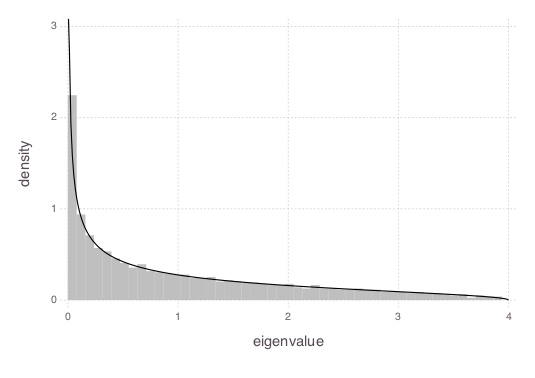

In [38]:
@manipulate for λ=0:0.1:2 #ratio of number of rows to number of columns
    if λ<1
        nc = 1000 #number of cols
        nr = round(Int, λ*nc)
    else
        nr = 1000 #number of rows
        nc = round(Int, nr/λ)
    end

    #Sample random matrix
    X = randn(nr, nc)/√nc
    Y = Symmetric(X*X')
    randdata = eigvals(Y);
    filter!(x->x>1e-13, randdata)#[]
    #Plot the analytic distribution
    λ₊ = (1+√λ)^2
    λ₋ = (1-√λ)^2
    dν(x) = λ*√((λ₊-x)*(x-λ₋))/(2π*λ*x)

    plotgrid = linspace(λ₋, λ₊, 300)
    plotdν = map(dν, plotgrid)

    p = plot(
    #Guide.title("Marchenko-Pastur distribution (from $nr × $nc matrix)"),
        Guide.xlabel("eigenvalue"),
        Guide.ylabel("density"),
        Coord.Cartesian(xmin=0),
        layer(Geom.line, x=plotgrid, y=plotdν,
            Theme(default_color=colorant"black")),
        layer(Geom.histogram(bincount=50, density=true), x=randdata,
            Theme(default_color=colorant"grey75")),
    )
    #draw(PDF("fig-mplaw-ev.pdf", 4inch, 3inch), p)
    p
end

## Marchenko-Pastur for the singular values

We can skip forming $X X^T$ by computing the singular values of $X$ instead.
Remember to transform the distribution accordingly.

Interact.Slider{Float64}(Signal{Float64}(1.0, nactions=0),"λ",1.0,0.0:0.1:2.0,true)

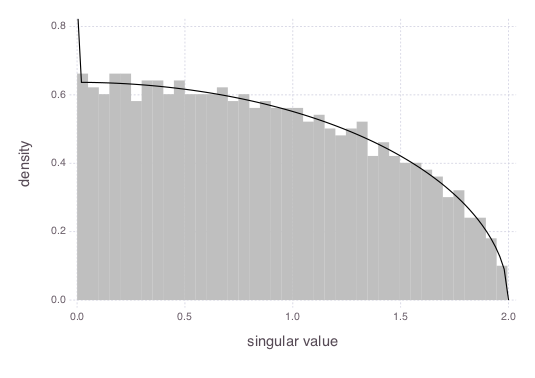

In [39]:
@manipulate for λ=0:0.1:2 #ratio of number of rows to number of columns
    if λ<1
        nc = 1000 #number of cols
        nr = round(Int, λ*nc)
    else
        nr = 1000 #number of rows
        nc = round(Int, nr/λ)
    end

    #Sample random matrix
    X = randn(nr, nc)/√nc
    #Y = Symmetric(X*X')
    randdata = svdvals(X);

    #Plot the analytic distribution
    λ₊ = (1+√λ)
    λ₋ = abs(1-√λ)
    dν(x) = √abs((λ₊^2-x^2)*(x^2-λ₋^2))/(π*min(λ,1)*x)

    plotgrid = linspace(λ₋, λ₊, 100)
    plotdν = map(dν, plotgrid)

    p = plot(
        #Guide.title("Marchenko-Pastur distribution (from $nr × $nc matrix)"),
        Guide.xlabel("singular value"),
        Guide.ylabel("density"),
        Coord.Cartesian(xmin=0),
        layer(Geom.line, x=plotgrid, y=plotdν,
            Theme(default_color=colorant"black")),
        layer(Geom.histogram(bincount=40, density=true), x=randdata,
            Theme(default_color=colorant"grey75")),
    )
    #draw(PDF("fig-mplaw-sv.pdf", 4inch, 3inch), p)
    p
end

## Scree plot

Interact.Slider{Float64}(Signal{Float64}(1.0, nactions=0),"λ",1.0,0.0:0.1:2.0,true)

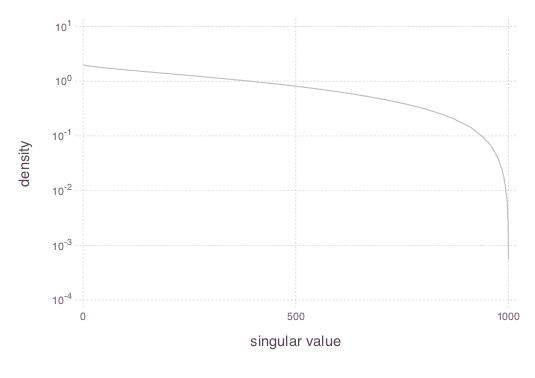

In [43]:
@manipulate for λ=0:0.1:2 #ratio of number of rows to number of columns
    if λ<1
        nc = 1000 #number of cols
        nr = round(Int, λ*nc)
    else
        nr = 1000 #number of rows
        nc = round(Int, nr/λ)
    end

    #Sample random matrix
    X = randn(nr, nc)/√nc
    #Y = Symmetric(X*X')
    randdata = svdvals(X);

    #Plot the analytic distribution
    λ₊ = (1+√λ)
    λ₋ = abs(1-√λ)
    dν(x) = √abs((λ₊^2-x^2)*(x^2-λ₋^2))/(π*min(λ,1)*x)

    plotgrid = linspace(λ₋, λ₊, 100)
    plotdν = map(dν, plotgrid)

    p = plot(
        #Guide.title("Marchenko-Pastur distribution (from $nr × $nc matrix)"),
        Guide.xlabel("singular value"),
        Guide.ylabel("density"),
    Coord.Cartesian(xmin=0), Scale.y_log10,
        #layer(Geom.line, x=plotgrid, y=plotdν,
        #    Theme(default_color=colorant"black")),
    layer(x=1:length(randdata), y=randdata, Geom.line,
            Theme(default_color=colorant"grey75")),
    )
    #draw(PDF("fig-mplaw-sv.pdf", 4inch, 3inch), p)
    p
end

In [ ]:
@manipulate for λ=0:0.2:2 #ratio of number of rows to number of columns
    if λ>1
        nr = 1000 #number of rows
        nc = round(Int, nr/λ)
    else
        nc = 1000 #number of cols
        nr = round(Int, λ*nc)
    end

    #Sample random matrix
    X = randn(nr, nc)/√nc
    #Y = Symmetric(X*X')
    randdata = svdvals(X);

    #Plot the analytic distribution
    λ₊ = (1+√λ)
    λ₋ = abs(1-√λ)
    dν(x) = √abs((λ₊^2-x^2)*(x^2-λ₋^2))/(π*min(λ,1)*x)

    plotgrid = linspace(λ₋, λ₊, 100)
    plotdν = map(dν, plotgrid)

    plot(
        Guide.title("Marchenko-Pastur distribution (from $nr × $nc randn)"),
        Guide.xlabel("Magnitude of singular value"),
        Guide.ylabel("Probability density"),
        Coord.Cartesian(xmin=0),
        layer(Geom.line, x=plotgrid, y=plotdν,
            Theme(default_color=colorant"black")),
        layer(Geom.histogram(bincount=50, density=true), x=randdata,
            Theme(default_color=colorant"grey75")),
    )
end

## Marchenko-Pastur as the scree plot

What does Marchenko-Pastur look like when you compute it as a scree plot (singular value vs index)? The y value is the magnitude of the singular value; the x value is the quantile.

Interact.Slider{Float64}(Signal{Float64}(1.0, nactions=0),"λ",1.0,0.0:0.2:2.0,true)

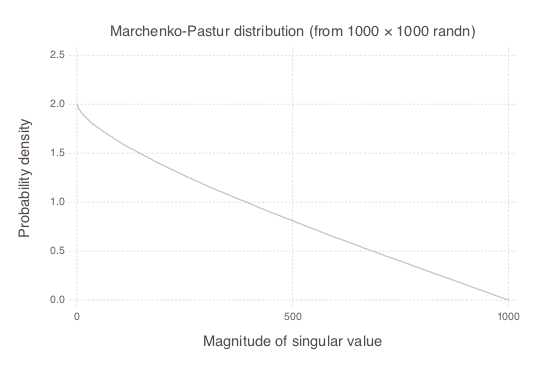

In [10]:
@manipulate for λ=0:0.2:2 #ratio of number of rows to number of columns
    if λ>1
        nr = 1000 #number of rows
        nc = round(Int, nr/λ)
    else
        nc = 1000 #number of cols
        nr = round(Int, λ*nc)
    end

    #Sample random matrix
    X = randn(nr, nc)/√nc
    randdata = svdvals(X);

    #Plot the analytic distribution
    #It's actually horribly complicated...
    #dν(x) = 1.7-0.002x
    
    #plotgrid = linspace(1, length(randdata), 2)
    #plotdν = map(dν, plotgrid)

    plot(
        Guide.title("Marchenko-Pastur distribution (from $nr × $nc randn)"),
        Guide.xlabel("Magnitude of singular value"),
        Guide.ylabel("Probability density"),
        Coord.Cartesian(xmin=0),
    #  layer(Geom.line, x=plotgrid, y=plotdν,
    #       Theme(default_color=colorant"black")),
        layer(Geom.line, x=1:length(randdata), y=randdata,
            Theme(default_color=colorant"grey75")),
    )
end

# Load in some real data

Update: We don't have permission to share this data...

In [44]:
realdata = readdlm("svdvals.txt")
n = length(realdata)

41500

Interact.Slider{Float64}(Signal{Float64}(1.0, nactions=0),"σ²",1.0,0.9:0.01:1.1,true)

Interact.Slider{Float64}(Signal{Float64}(1.86, nactions=0),"ratio",1.86,1.81:0.01:1.91,true)

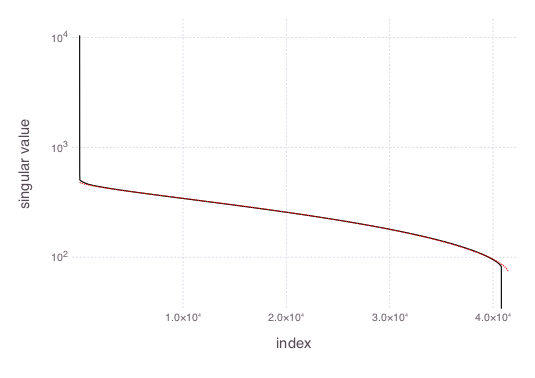

In [143]:
using Interact
@manipulate for σ²=0.9:0.01:1.1, ratio=1.81:0.01:1.91
    nr = 2000
    nc = round(Int, nr/ratio)
    X = randn(nr, nc)
    randdata = svdvals(X);
    
    p=plot(
    Coord.Cartesian(xmax=length(realdata), ymin=1.6, ymax=4.1),
    Guide.ylabel("singular value"), 
    Guide.xlabel("index"), Scale.y_log10,
    layer(x=1.0:n/length(randdata):n, y=σ²*√(41505/nc)*randdata,
    Geom.line, Theme(default_color=colorant"red", line_style=[0.3mm, 0.3mm])),
    #layer(x=100:n, y=realdata[100:n],
    layer(x=1:n, y=realdata[1:n],
    Geom.line, Theme(default_color=colorant"black")),
)
    draw(PDF("fig-empirical-scree.pdf",4inch,3inch),p)
    p
end
#Fits ratio=1.86

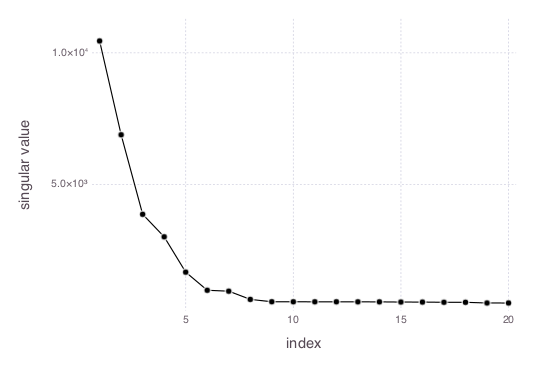

In [131]:
#    σ² = 1
#    ratio = 1.86
#    nr = 2000
#    nc = round(Int, nr/ratio)
#    X = randn(nr, nc)
#    randdata = svdvals(X);
    
    p=plot(
    Coord.Cartesian(xmax=20, ymax=1.1e4),
    Guide.ylabel("singular value"),
    Guide.xlabel("index"),
#    layer(x=1.0:n/length(randdata):n, y=σ²*√(41505/nc)*randdata,
#    Geom.line, Theme(default_color=colorant"red", line_style=[0.1mm, 0.5mm])),
    #layer(x=100:n, y=realdata[100:n],
    layer(x=1:20, y=realdata[1:20], Geom.point,
    Geom.line, Theme(default_color=colorant"black")),
)
    draw(PDF("fig-empirical-scree20.pdf",4inch,3inch),p)
    p


INFO: 0.9985569664623991
INFO: 18 outliers


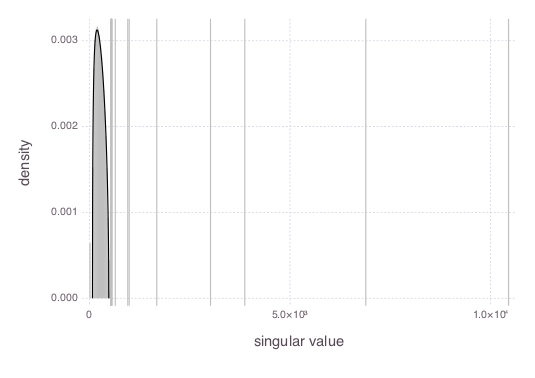

In [115]:
# Plot as a density

λ=1.86#0.54#81700/41505
σ²=1.0*41505
#Plot the analytic distribution
λ₊ = √σ²*(1+√λ)
λ₋ = √σ²*abs(1-√λ)
dν(x) = √abs((λ₊^2-x^2)*(x^2-λ₋^2))/(π*min(λ,1)*σ²*x)

plotgrid = linspace(λ₋, λ₊, 100)
plotdν = map(dν, plotgrid)
info(sum(plotdν)*(plotgrid[2]-plotgrid[1]))

#Pick out the ones larger than λ₊
outliers = filter(x->x>1.1λ₊, realdata)
info("$(length(outliers)) outliers")
p = plot(
    #Guide.title("Marchenko-Pastur distribution (from $nr × $nc matrix)"),
    Guide.xlabel("singular value"),
    Guide.ylabel("density"),
Coord.Cartesian(xmin=0, ymin=0),# xmax=40),#, Scale.x_log10,
    layer(Geom.line, x=plotgrid, y=plotdν,
        Theme(default_color=colorant"black")),
layer(Geom.histogram(bincount=400, density=true), x=realdata,
        Theme(default_color=colorant"grey75")),
layer(Geom.vline, xintercept=outliers,
Theme(default_color=colorant"grey75"))
)
draw(PDF("fig-empirical-density.pdf", 4inch, 3inch), p)
p

In [114]:
#Try to estimate the correct parameters for the Marčenko-Pastur law


In [ ]:
using Interact
@manipulate for σ²=10.0:0.1:11.0
    plot(
Guide.ylabel("singular value"),
Guide.xlabel("index"),
    layer(x=100:n, y=realdata[100:end],
    Geom.line, Theme(default_color=colorant"black")),
layer(x=1.0:n/length(randdata):n, y=σ²*randdata,
    Geom.line, Theme(default_color=colorant"red")),
)
end

In [ ]:
using Interact
@manipulate for σ²=11:0.1:13, ratio=0.5:0.02:0.7
nr = 1000
nc = round(Int, ratio*nr)
X = randn(nr, nc)
randdata = svdvals(X);
    
    plot(
Guide.ylabel("singular value"),
Guide.xlabel("index"),
    layer(x=100:n, y=realdata[100:end],
    Geom.line, Theme(default_color=colorant"black")),
layer(x=1.0:n/length(randdata):n, y=σ²*randdata,
    Geom.line, Theme(default_color=colorant"red")),
)
end
#var = 12, ratio = 0.58

In [ ]:
#The last thing we need to do is figure out
#How does largest singular value scale with matrix size?

ns = [100:100:1000;]
svdmax = Float64[]
for nr in ns
    ratio = 0.5
    nc = round(Int, ratio*nr)
    X = randn(nr, nc)/(√(nr*√8))
    sig = svdvals(X)[1]
    info("$nr: $sig")
    push!(svdmax, sig)
end

plot(
    Guide.ylabel("singular value"),
Guide.xlabel("N"),# Scale.y_log10,
    x=ns, y=svdmax, Geom.point
)

In [ ]:
var = 12*√(1000/81700)

In [ ]:
#How many low rank components do we have?

@manipulate for n=1:50
    plot(
    Guide.ylabel("singular value"),
    Guide.xlabel("index"),
    Scale.y_log10,
        layer(x=1:n, y=realdata[1:n],
    Geom.line, Geom.point,
    Theme(default_color=colorant"black")),
    )
end

# Plotting all the various parts of the scree plot

In [ ]:
#How many low rank components do we have?
n=length(realdata)
draw(PDF("scree.pdf", 8inch, 6inch),
    plot(
    Guide.ylabel("singular value"),
    Guide.xlabel("index"),
    Coord.Cartesian(xmax=n),
    layer(x=1:n, y=realdata[1:n],
    Geom.line,
    Theme(default_color=colorant"black")),
    layer(x=linspace(1,length(realdata), min(nc, nr)), y=σ²*randdata,
        Geom.line,
    Theme(default_color=colorant"red",
        line_style=([0.5mm, 0.5mm])))
    )
)

In [ ]:
#How many low rank components do we have?
n=20
draw(PDF("scree20.pdf", 8inch, 6inch),
    plot(
    Guide.ylabel(""),
    Guide.xlabel(""),
    Scale.y_log10,
        layer(x=1:n, y=realdata[1:n],
    Geom.line, Geom.point,
    Theme(default_color=colorant"black")),
    )
)

In [ ]:
#Plot everything else
n=11
σ²= 12
λ = 0.58
nr = 1000
nc = round(Int, λ*nr)
X = randn(nr, nc)
randdata = svdvals(X);

draw(PDF("scree-rest.pdf", 8inch, 6inch),
    plot(
    Guide.ylabel(""),
    Guide.xlabel(""),
    Scale.y_log10,
    Coord.Cartesian(ymin=1.5, xmax=41700),
    layer(x=n:length(realdata), y=realdata[n:end],
    Geom.line,
    Theme(default_color=colorant"black", grid_color=nothing)
    ),
    layer(x=linspace(1,length(realdata), min(nc, nr)), y=σ²*randdata,
        Geom.line,
    Theme(default_color=colorant"red",
        line_style=([0.5mm, 0.5mm]))

    )
    )
)

In [ ]:
#Plot everything else
n=40_800
σ²= 12
λ = 0.58
nr = 1000
nc = round(Int, λ*nr)
X = randn(nr, nc)
randdata = svdvals(X);

#draw(PDF("scree-rest.pdf", 8inch, 6inch),
    plot(
Guide.title("Shoulder around n=40_808"),
    Guide.ylabel(""),
    Guide.xlabel(""),
    Scale.y_log10,
    Coord.Cartesian(ymin=1.8, ymax=2.1, xmin=n, xmax=40_830),
    layer(x=n:length(realdata), y=realdata[n:end],
    Geom.line,
    Theme(default_color=colorant"black", grid_color=nothing)
    ),
    layer(x=linspace(1,length(realdata), min(nc, nr)), y=σ²*randdata,
Geom.line, Geom.point,
    Theme(default_color=colorant"red",
        line_style=([0.5mm, 0.5mm]))

    )
    )
#)

# Density plot of the real data

In [ ]:
@manipulate for λ = 0.4:0.02:0.7, σ²= 80000:5000:120000
    #Plot the analytic distribution
    λ₊ = √σ²*(1+√λ)
    λ₋ = √σ²*abs(1-√λ)
    dν(x) = √abs((λ₊^2-x^2)*(x^2-λ₋^2))/(π*σ²*min(λ,1)*x)

    plotgrid = linspace(λ₋, λ₊, 100)
    plotdν = map(dν, plotgrid)

    plot(
    Guide.title("Marchenko-Pastur distribution (from λ=$λ, σ²=$σ²)"),
        Guide.xlabel("Magnitude of singular value"),
        Guide.ylabel("Probability density"),
        Coord.Cartesian(xmin=0),
        layer(Geom.line, x=plotgrid, y=plotdν,
            Theme(default_color=colorant"black")),
        layer(Geom.histogram(bincount=500, density=true), x=realdata,
            Theme(default_color=colorant"grey75")),
    )
end

# The cheapo random model

In [ ]:
function randrange(n)
    i1 = rand(1:n)
    i2 = rand(1:n)
    if i1 > i2
        return i2, i1
    else
        return i1, i2
    end
end

function model(m::Int, n::Int, r::Int=10, nsignal=round(Int,√(m*n)), rkins=0.017)
    A = zeros(m, n)
    #Model population stratification
    #by randomly setting a subblock to the same value, k
    for i=1:r
        k = rand(0:2)
        i1, i2 = randrange(m)
        j1, j2 = randrange(n)
        A[i1:i2, j1:j2] = k
    end
   
    #Model signal
    for i=1:nsignal
        A[rand(1:m), rand(1:n)] = rand(0:2)
    end
    
    #Model kinship by duplicating columns
    nkins = round(Int, rkins*n)
    for i=1:nkins
        A[:, rand(1:n)] = A[:, rand(1:n)]
    end
    A
end

function center!(A::AbstractMatrix)
    for i=1:size(A, 2)
        A[:,i] -= mean(A[:,i])
        A[:,i] /= std(A[:,i])
    end
    A
end

In [ ]:
scalefactor = sqrt(81700/1000)
σ²=12
ratio=0.58

n = length(realdata)
nr = 1000
nc = round(Int, ratio*nr)
X = randn(nr, nc)


τ²=9.5
r=10
rsignal=1.0
nr2 = 8170÷5
nc2 = 4150÷5

nsignal=round(Int, rsignal*(nr2*nc2))
randdata = svdvals(X);
mymodel = center!(model(nr2, nc2, r, nsignal))
rmodel = svdvals(mymodel);

info(std(vec(mymodel)))

p = plot(
Guide.ylabel("singular value"),
Guide.xlabel("index"),
Coord.Cartesian(ymin=2),
Scale.y_log10,
Theme(grid_color=colorant"white"),
    layer(x=1:n, y=realdata,
    Geom.line, Theme(default_color=colorant"grey")),
        layer(x=linspace(1, n, min(nr, nc)), y=σ²*randdata,
    Geom.line, Theme(default_color=colorant"red",
        line_style=([0.5mm, 0.5mm]))),
layer(x=linspace(1, n, min(nr2, nc2)), y=τ²*rmodel,
    Geom.line, Theme(default_color=colorant"blue",
        line_style=([0.1mm, 0.5mm])) ),
)
draw(PDF("scree.pdf", 8inch, 6inch), p)
p

In [ ]:
scalefactor = sqrt(81700/1000)
σ²=12
ratio=0.58

τ²=15.5
r=10
rsignal=1.0

n = length(realdata)
nr = 1000
nc = round(Int, ratio*nr)
X = randn(nr, nc)

nsignal=round(Int, rsignal*(nr*nc))
randdata = svdvals(X);
mymodel = center!(model(nr, nc, r, nsignal))
rmodel = svdvals(mymodel);

info(std(vec(mymodel)))

p = plot(
Guide.ylabel("singular value"),
Guide.xlabel("index"),
Coord.Cartesian(ymin=2.7, xmax=20),
Scale.y_log10,
Theme(grid_color=colorant"white"),
    layer(x=1:20, y=realdata[1:20],
    Geom.point, Geom.line, Theme(default_color=colorant"grey")),
    #    layer(x=linspace(1, n, min(nr, nc)), y=σ²*randdata,
    #Geom.line, Theme(default_color=colorant"red",
    #    line_style=([0.5mm, 0.5mm]))),
layer(x=1:20, y=τ²*rmodel[1:20],
Geom.line, Geom.point, Theme(default_color=colorant"blue",
        line_style=([0.1mm, 0.5mm])) ),
)
draw(PDF("scree20.pdf", 8inch, 6inch), p)
p